# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Özge BÜLBÜL
# Student ID: 2220765008

In [323]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

(PK:Primary Key, FK: Foreign Key)
## Table 1: Customers
| Column         | Type | Description |
|---------------|---------------|---------------|
| CustomerID     | PK integer|Unique id of customer|
| CustomerName     | string|Name of the customer|
| CustomerEmail     | string|Email address of the customer|
| CustomerPhone     | string|Phone number of the customer|

## Table 2: Flights
| Column         | Type | Description |
|---------------|---------------|---------------|
| FlightID     | PK integer|Unique id of flight|
| Flight_Departure     | string|Departure place of the flight|
| Flight_Destination     | string|Destination of the flight|
| Flight_Date     | string|Date of the flight|
| AirplaneID     | double|Id of the airplane|
| AirlineName     | string|Name of the airline|
| AirlineID     | integer|Id of the airline|

AirplaneID column is later revealed empty, then dropped.

## Table 3: Hotels
| Column         | Type | Description |
|---------------|---------------|---------------|
| HotelID     | PK double|Unique id of hotel|
| HotelName     | string|Name place of the hotel|
| HotelLocation     | string|Location of the hotel|
| HotelRating     | string|Rating of the hotel|

## Table 4: Feedbacks
| Column         | Type | Description |
|---------------|---------------|---------------|
| FeedbackID     | PK integer|Unique id of the feedback|
| CustomerID     | FK integer|Unique id of the customer|
| AirplaneID     | FK integer|Unique id of the airplane|
| HotelID     | FK double|Unique id of the hotel|
| Review     | string|Review|

## Table 5: Bookings
| Column         | Type | Description |
|---------------|---------------|---------------|
| BookingID     | PK integer|Unique id of the booking|
| CustomerID     | FK integer|Unique id of the customer|
| FlightID     | FK integer|Unique id of the flight|
| HotelID     | FK double|Unique id of the hotel|

Note: For the feedbacks and bookings tables, customers have either made a review or a booking on one hotel or flight(not in total but in each row). These data could be seperated like:
Table 4: Hotel Feedbacks
Table 5: Flight Feedbacks
Table 6: Hotel Bookings
Table 7: Flight Bookings
but I personally decided to use one booking and one feedback table to not make things complicated.


In [324]:
# read file into db and create a db using sqlite3
import csv
# created a database
connection = sqlite3.connect('customerDatabase.db')
cursor = connection.cursor()
# created the tables
cursor.execute('DROP TABLE IF EXISTS Customers')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Customers (
        CustomerID INTEGER UNIQUE,
        CustomerName TEXT,
        CustomerEmail TEXT,
        CustomerPhone TEXT
    )
''')
cursor.execute('DROP TABLE IF EXISTS Flights')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Flights (
        FlightID INTEGER UNIQUE,
        Flight_Departure TEXT,
        Flight_Destination TEXT,
        Flight_Date TEXT,
        AirplaneID DOUBLE,
        AirlineName TEXT,
        AirlineID INTEGER       
    )
''')
cursor.execute('DROP TABLE IF EXISTS Hotels')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Hotels (
        HotelID DOUBLE UNIQUE,
        HotelName TEXT,
        HotelLocation TEXT,
        HotelRating TEXT
    )
''')
cursor.execute('DROP TABLE IF EXISTS Feedbacks')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Feedbacks (
        FeedbackID INTEGER,
        CustomerID INTEGER,
        AirlineID INTEGER,
        HotelID DOUBLE,
        Review TEXT,
        PRIMARY KEY (FeedbackID),
        FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID),
        FOREIGN KEY (AirlineID) REFERENCES Flights(AirlineID),
        FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID)
    )
''')
cursor.execute('DROP TABLE IF EXISTS Bookings')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Bookings (
        BookingID INTEGER,
        CustomerID INTEGER,
        FlightID INTEGER,
        HotelID DOUBLE,
        PRIMARY KEY (BookingID),
        FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID),
        FOREIGN KEY (FlightID) REFERENCES Flights(FlightID),
        FOREIGN KEY (HotelID) REFERENCES Hotels(HotelID)
    )
''')
connection.commit()

In [325]:
booking_df = pd.read_csv("BookingDetails.csv", sep=',')
booking_df

,BookingID,CustomerID,CustomerName,CustomerEmail,CustomerPhone,FlightID,Flight_Departure,Flight_Destination,Flight_Date,AirplaneID,AirlineName,HotelID,HotelName,HotelLocation,HotelRating,AirlineID
0,1,6145,Ethan Smith,ethan.smith@mail.com,555-0665405,8513.0,Hong Kong,Barcelona,2024-10-07 16:33:28.557244,NaN,AirZoom,NaN,NaN,NaN,NaN,8533.0
1,2,6145,Ethan Smith,ethan.smith@mail.com,555-0665405,NaN,NaN,NaN,NaN,NaN,NaN,1647.0,Silver Villa,Location_42,5.0,NaN
2,3,6145,Ethan Smith,ethan.smith@mail.com,555-0665405,4951.0,Barcelona,Paris,2024-05-31 16:33:28.557253,NaN,AirZoom,NaN,NaN,NaN,NaN,8533.0
3,4,6148,Ethan Martinez,ethan.martinez@mail.com,555-3339628,NaN,NaN,NaN,NaN,NaN,NaN,6921.0,Ruby Plaza,Location_4,5.0,NaN
4,5,6148,Ethan Martinez,ethan.martinez@mail.com,555-3339628,NaN,NaN,NaN,NaN,NaN,NaN,1919.0,Emerald Motel,Location_50,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799,NaN,NaN,NaN,NaN,NaN,NaN,5769.0,Golden Resort,Location_5,1.0,NaN
992,993,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799,8290.0,Hong Kong,Dubai,2024-03-05 16:33:28.557151,NaN,AirNest,NaN,NaN,NaN,NaN,9097.0
993,994,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799,7243.0,Hong Kong,London,2024-08-17 16:33:28.557143,NaN,SkyWings,NaN,NaN,NaN,NaN,5415.0
994,995,8188,Mia Williams,mia.williams@mail.com,555-2208244,9617.0,Hong Kong,New York,2024-03-30 16:33:28.557277,NaN,EagleEye,NaN,NaN,NaN,NaN,4815.0


In [326]:
# I first created dataframes to drop null and duplicate values. After making sure everything is okay, I added these values to my database tables.
customer = ['CustomerID', 'CustomerName', 'CustomerEmail', 'CustomerPhone']
customer_df = booking_df[customer].copy()
customer_df.drop_duplicates(inplace=True)
customer_df.to_sql('Customers', connection, if_exists='replace', index=False)

hotel = ['HotelID', 'HotelName', 'HotelLocation', 'HotelRating']
hotel_df = booking_df.loc[booking_df['HotelID'].notnull(), hotel].copy()
hotel_df.drop_duplicates(inplace=True)
hotel_df.to_sql('Hotels', connection, if_exists='replace', index=False)

flight = ['FlightID', 'Flight_Departure', 'Flight_Destination',	'Flight_Date', 'AirplaneID', 'AirlineName', 'AirlineID']
flight_df = booking_df.loc[booking_df['FlightID'].notnull(), flight]
flight_df.drop_duplicates(inplace=True)
if (flight_df['AirplaneID'].isnull().all()):
    flight_df = flight_df.drop(columns='AirplaneID')    # dropped airplaneid because it's fully empty
flight_df.to_sql('Flights', connection, if_exists='replace', index=False)

booking = ['BookingID',	'CustomerID', 'FlightID', 'HotelID']
bookingtable_df = booking_df.loc[booking_df['BookingID'].notnull(), booking]
bookingtable_df.to_sql('Bookings', connection, if_exists='replace', index=False)

feedback_df = pd.read_csv("FeedbackDetails.csv", sep=',')
feedback_df.to_sql('Feedbacks', connection, if_exists='replace', index=False)
connection.commit()

connection.commit()

In [327]:
display(pd.read_sql('''
SELECT *
FROM Customers
''', connection))
display(pd.read_sql('''
SELECT *
FROM Flights
''', connection))
display(pd.read_sql('''
SELECT *
FROM Hotels
''', connection))
display(pd.read_sql('''
SELECT *
FROM Feedbacks
''', connection))
display(pd.read_sql('''
SELECT *
FROM Bookings
''', connection))

,CustomerID,CustomerName,CustomerEmail,CustomerPhone
0,6145,Ethan Smith,ethan.smith@mail.com,555-0665405
1,6148,Ethan Martinez,ethan.martinez@mail.com,555-3339628
2,4106,Ethan Rodriguez,ethan.rodriguez@mail.com,555-3077795
3,6156,Mia Rodriguez,mia.rodriguez@mail.com,555-6360055
4,4110,Ethan Martinez,ethan.martinez@mail.com,555-5293267
...,...,...,...,...
495,2016,Ethan Davis,ethan.davis@mail.com,555-4347686
496,4065,Mia Williams,mia.williams@mail.com,555-3213981
497,6117,Logan Martinez,logan.martinez@mail.com,555-6781352
498,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799


,FlightID,Flight_Departure,Flight_Destination,Flight_Date,AirlineName,AirlineID
0,8513.0,Hong Kong,Barcelona,2024-10-07 16:33:28.557244,AirZoom,8533.0
1,4951.0,Barcelona,Paris,2024-05-31 16:33:28.557253,AirZoom,8533.0
2,8673.0,Istanbul,Dubai,2024-07-19 16:33:28.557320,AirWave,8863.0
3,2794.0,Kuala Lumpur,London,2023-12-29 16:33:28.557202,JetStream,2218.0
4,8338.0,Istanbul,Barcelona,2024-03-03 16:33:28.557169,SkyPace,6418.0
...,...,...,...,...,...,...
94,6159.0,Hong Kong,Istanbul,2024-01-26 16:33:28.557118,AirZoom,8533.0
95,6888.0,Paris,Barcelona,2024-02-09 16:33:28.557200,AirNest,9097.0
96,8285.0,Paris,Singapore,2024-02-16 16:33:28.557149,FlyHigh,3233.0
97,2391.0,Singapore,Barcelona,2024-08-18 16:33:28.557252,EagleEye,4815.0


,HotelID,HotelName,HotelLocation,HotelRating
0,1647.0,Silver Villa,Location_42,5.0
1,6921.0,Ruby Plaza,Location_4,5.0
2,1919.0,Emerald Motel,Location_50,4.0
3,7428.0,Crystal Motel,Location_3,4.0
4,5095.0,Sapphire Hideaway,Location_39,5.0
5,3670.0,Diamond Villa,Location_29,4.0
6,4927.0,Jade Suites,Location_25,5.0
7,2504.0,Pearl Resort,Location_26,2.0
8,5991.0,Golden Resort,Location_38,3.0
9,6925.0,Ruby Palace,Location_6,1.0


,FeedbackID,CustomerID,AirlineID,HotelID,Review
0,3073,7498,6418.0,NaN,Horrible experience with the seat.
1,6658,6744,6418.0,NaN,The cabin cleanliness was impressive.
2,6149,8207,3233.0,NaN,Decent experience with the cabin cleanliness.
3,8198,9382,6418.0,NaN,I found the in-flight entertainment to be aver...
4,8710,3067,2218.0,NaN,The crew was average.
...,...,...,...,...,...
595,8182,4009,NaN,4147.0,Impressive experience with the room.
596,2041,7934,NaN,4656.0,Fantastic experience with the service.
597,6650,2310,NaN,2525.0,The pool was excellent.
598,7164,7798,NaN,5994.0,The service was average.


,BookingID,CustomerID,FlightID,HotelID
0,1,6145,8513.0,NaN
1,2,6145,NaN,1647.0
2,3,6145,4951.0,NaN
3,4,6148,NaN,6921.0
4,5,6148,NaN,1919.0
...,...,...,...,...
991,992,6134,NaN,5769.0
992,993,6134,8290.0,NaN
993,994,6134,7243.0,NaN
994,995,8188,9617.0,NaN


## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [328]:
# I joined hotels by their id (because they are unique) from bookings and hotels tables. Then counted bookings of each hotel and put them in a dataframe.
cursor.execute('''
    SELECT Hotels.HotelName, COUNT(Bookings.BookingID) as BookingCount
    FROM Hotels
    LEFT JOIN Bookings ON Hotels.HotelID = Bookings.HotelID
    GROUP BY Hotels.HotelID
''')
result = cursor.fetchall()
hotelBooking_df = pd.DataFrame(result, columns=["Hotel Name", "Number of Bookings"])
hotelBooking_df

,Hotel Name,Number of Bookings
0,Opal Motel,11
1,Diamond Plaza,6
2,Golden Suites,16
3,Silver Villa,10
4,Emerald Motel,15
5,Sapphire Villa,14
6,Jade Motel,5
7,Jade Suites,7
8,Pearl Resort,12
9,Emerald Resort,9


## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [341]:
# Joined customers on customer id from feedbacks and customers tables, where that customer made a feedback on both a hotel and an airline.
# "INTERSECT" command ensures this. In addition, I used "DISTINCT" command to ensure there are no duplicate entries.
cursor.execute('''
                SELECT DISTINCT CustomerName, CustomerEmail, CustomerPhone
                FROM Customers
                JOIN Feedbacks ON Customers.CustomerID=Feedbacks.CustomerID
                WHERE Customers.CustomerID IN(
                    SELECT CustomerID
                    FROM Feedbacks
                    WHERE HotelID IS NOT NULL
                    INTERSECT
                    SELECT CustomerID
                    FROM Feedbacks
                    WHERE AirlineID IS NOT NULL
                )
               ''')
result = cursor.fetchall()
feedbackCustomer_df = pd.DataFrame(result, columns=["Customer Name", "Email Address", "Phone Number"])
feedbackCustomer_df


,Customer Name,Email Address,Phone Number
0,Ethan Martinez,ethan.martinez@mail.com,555-3339628
1,Sophia Davis,sophia.davis@mail.com,555-7585879
2,Liam Miller,liam.miller@mail.com,555-3750839
3,Mason Brown,mason.brown@mail.com,555-4291570
4,Ethan Smith,ethan.smith@mail.com,555-4014268
...,...,...,...
104,Logan Martinez,logan.martinez@mail.com,555-6346303
105,Liam Brown,liam.brown@mail.com,555-5183574
106,Ethan Rodriguez,ethan.rodriguez@mail.com,555-5432713
107,Olivia Davis,olivia.davis@mail.com,555-6970002


## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [330]:
# With "AVG()" I first found average feedback rating of all hotels. Then selected hotels which have a rating lower than average.
cursor.execute('''
                SELECT HotelName, HotelRating
                FROM Hotels
                WHERE HotelRating < (SELECT AVG(HotelRating) FROM Hotels)
        ''')
result = cursor.fetchall()
lowRate_df = pd.DataFrame(result, columns=["Hotel Name", "Rating"])
lowRate_df


,Hotel Name,Rating
0,Pearl Resort,2.0
1,Golden Resort,3.0
2,Ruby Palace,1.0
3,Golden Resort,1.0
4,Golden Villa,3.0
5,Sapphire Suites,2.0
6,Opal Plaza,2.0
7,Diamond Plaza,2.0
8,Diamond Inn,2.0
9,Golden Hideaway,3.0


## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [331]:
# I joined bookings on customer id from customers and bookings tables, flights on flight id from flights and bookings tables,
# hotels on hotel id from hotels and bookings tables. 
# Then grouped the data by customer id and counted people who booked at least 3 hotels and at least 2 flights. 
# After that, selected these customers' names and their total number of (distinct) bookings.

# It is important to note that, the result of this query is empty because there exist no such customer to book 3 hotels and 2 flights.
cursor.execute('''
    SELECT Customers.CustomerName, COUNT(DISTINCT Bookings.BookingID) as TotalBookings
    FROM Customers
    LEFT JOIN Bookings ON Bookings.CustomerID = Customers.CustomerID
    LEFT JOIN Flights ON Bookings.FlightID = Flights.FlightID
    LEFT JOIN Hotels ON Bookings.HotelID = Hotels.HotelID
    GROUP BY Customers.CustomerID
    HAVING COUNT(DISTINCT Hotels.HotelID) >= 3 AND COUNT(DISTINCT Flights.AirlineID) >= 2
''')

result = cursor.fetchall()
bookingDF = pd.DataFrame(result, columns=["Customer Name", "Total Number of Bookings"])
bookingDF

,Customer Name,Total Number of Bookings


## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [332]:
cursor.execute('''
                SELECT DISTINCT CustomerName, CustomerEmail, CustomerPhone
                FROM Customers
                JOIN Feedbacks ON Customers.CustomerID=Feedbacks.CustomerID
                WHERE Customers.CustomerID IN(
                    SELECT CustomerID
                    FROM Feedbacks
                    WHERE HotelID != ""
                    INTERSECT
                    SELECT CustomerID
                    FROM Feedbacks
                    WHERE AirlineID != ""
                )
               ''')
result = cursor.fetchall()
feedbackCustomer_df = pd.DataFrame(result, columns=["Customer Name", "Email Address", "Phone Number"])
feedbackCustomer_df

,Customer Name,Email Address,Phone Number
0,Ethan Martinez,ethan.martinez@mail.com,555-3339628
1,Sophia Davis,sophia.davis@mail.com,555-7585879
2,Liam Miller,liam.miller@mail.com,555-3750839
3,Mason Brown,mason.brown@mail.com,555-4291570
4,Ethan Smith,ethan.smith@mail.com,555-4014268
...,...,...,...
104,Logan Martinez,logan.martinez@mail.com,555-6346303
105,Liam Brown,liam.brown@mail.com,555-5183574
106,Ethan Rodriguez,ethan.rodriguez@mail.com,555-5432713
107,Olivia Davis,olivia.davis@mail.com,555-6970002


# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


In [333]:
df = pd.read_csv(r"titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [334]:
genderClass_pivotTable = pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex', aggfunc='mean')
genderClass_pivotTable

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


According to this table, we can say that women survival rate of all classes is higher than men. Passengers of the first class have survived the most and third class the least. 

## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


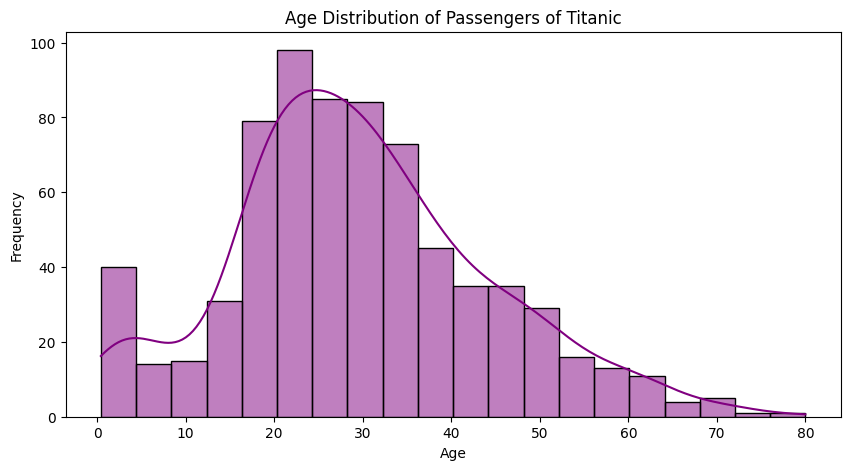

In [335]:
plt.figure(figsize=(10, 5))
# dropped nulls to avoid any possible problems, enabled kde to overlay this with a kde plot
sns.histplot(df['Age'].dropna(), kde=True, color='purple', bins=20)
plt.title('Age Distribution of Passengers of Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

By observing the plot, it is shown that people aged approximately 20 to 30 years are the most frequent among all passengers. Data peaks in between the ages 20 and 30.

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

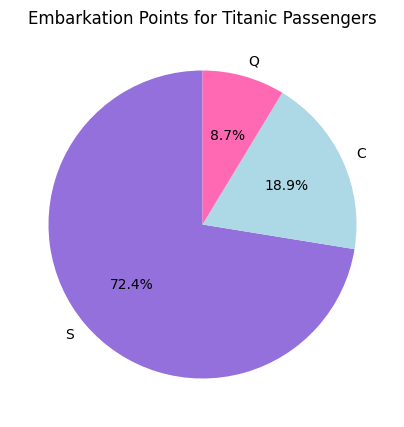

The port with the highest boarding: S


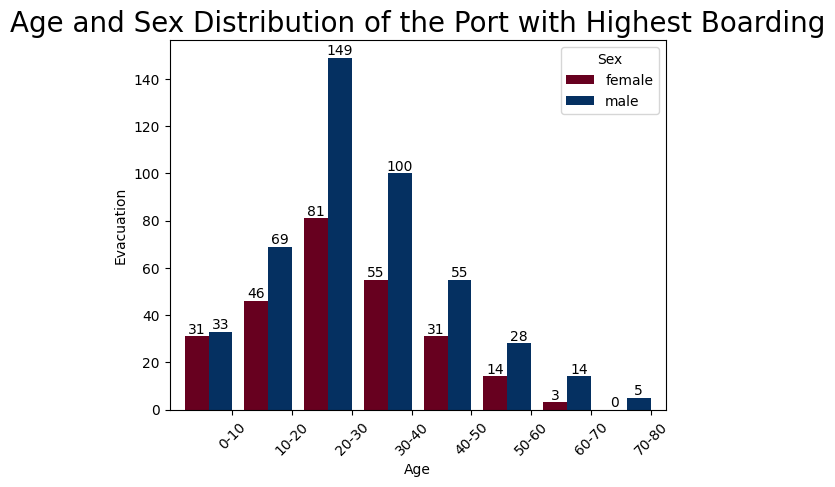

In [336]:
# Here, we take embarkation data and create a pie plot for 3 different ports.
embarks = df['Embarked'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(embarks.values, labels=embarks.index, autopct='%1.1f%%', startangle=90, colors=['MediumPurple', 'LightBlue', 'hotpink'])
plt.title('Embarkation Points for Titanic Passengers')
plt.show()
print(f"The port with the highest boarding: {embarks.idxmax()}")

# First I binned the ages. The gap between bins is 10.
bins = np.arange(0, 80, 10)
df['Age Bins'] = np.digitize(df.Age, bins, right=True)

# We use .unstack() so that all the data is correctly visualized. 
counts = df.groupby(['Age Bins', 'Sex']).Age.count().unstack()
axes = counts.plot(kind='bar',stacked = False, colormap = 'RdBu', width=0.8)
# For loop to annotate the plot with rounded height values at the center of each bar
for bar in axes.patches:
    axes.annotate(np.round(bar.get_height(), decimals=0).astype(np.int64), (bar.get_x() + bar.get_width() / 2., bar.get_height()), ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
# We use these labels  for the x axis.
bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
plt.xticks(np.arange(len(bin_labels)) + 0.4, bin_labels, rotation=45)
plt.xlabel ('Age')
plt.ylabel ('Evacuation')
plt.title('Age and Sex Distribution of the Port with Highest Boarding',fontsize=20)
plt.show()

In the "Age and Sex Distribution of the Port with Highest Boarding" plot, it is clearly shown that evacuation of women and kids first policy was not followed. The highest evacuation belongs to men between the ages 20-30. This group is neither female nor children. It is also shown that females of all age groups were evacuated less then men. If we observe females individually, we can see that children were not the priority here as well. Therefore no, this distribution does not reflect the "women and children first" evacuation policy.

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

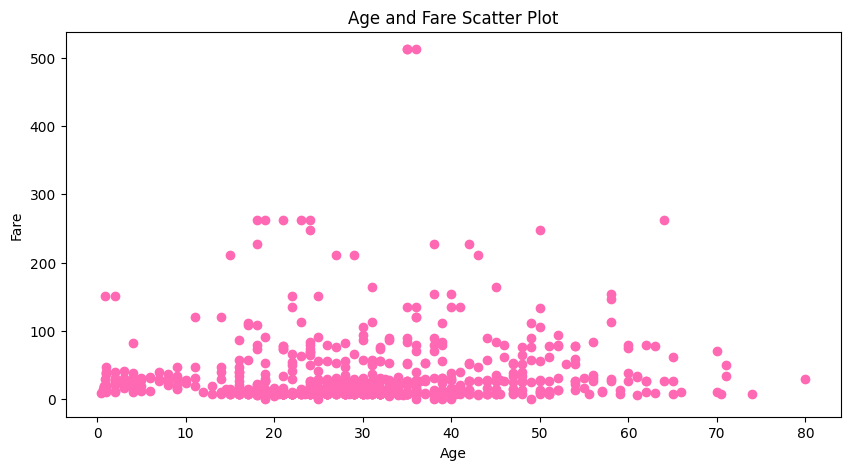

In [337]:
# Scatter plot to analyze the relationship between age and fare.
plt.figure(figsize=(10,5))
plt.scatter(df["Age"], df["Fare"], c="hotpink")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title('Age and Fare Scatter Plot')
plt.show()

From a quick glance at the scatter plot, we can say that not many people bought expensive tickets. The ticket fares lie under 100 for the majority of the people of titanic. If we were to inspect the relationship between fare and age, the most expensive tickets were bought by people of ages in between 30-40. In general, the cheapest tickets were bought by people of ages in between 20-40. Kids' tickets are mostly cheaper than adults'. The correlation is neither positive nor negative.

## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


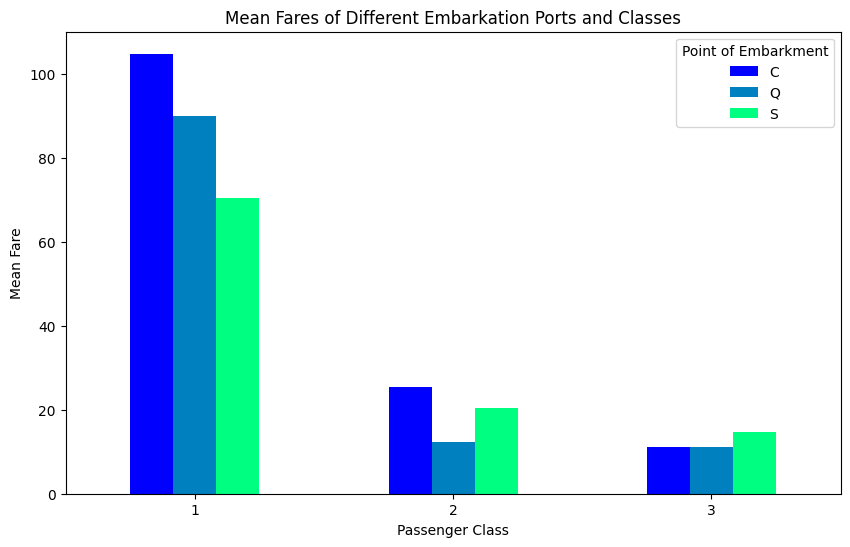

In [338]:
# Grouped the data by embarked, pclass and mean fare values.
grouped_data = df.groupby(['Embarked', 'Pclass'])['Fare'].mean().reset_index()
pivot_data = grouped_data.pivot(index='Pclass', columns='Embarked', values='Fare')  # I made pclass the x axis index and mean fare the y axis values.
ax = pivot_data.plot(kind='bar', colormap='winter', rot=0, figsize=(10, 6))
plt.title('Mean Fares of Different Embarkation Ports and Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Fare')
plt.legend(title='Point of Embarkment', loc='upper right')  # I put a legend to show 3 different ports' colours.
plt.show()

The mean fare value is highest in first class and lowest in third class. In the first and second classes, point of embarkment 'C' has the highest mean fare value. We can say that the passengers who has paid most for their tickets, evacuated from point 'C'. In addition, passengers who have paid the least amount for their tickets, used point 'S' more than the other two points.  

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
